### Student Information
Name: 黃若晴

Student ID: 111703064 NCCU

GitHub ID: sunnyrch

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [209]:
### Begin Assignment Here

## set up ## 

In [210]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.utils import Bunch
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap


[nltk_data] Downloading package punkt to /Users/huang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [211]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [212]:
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

/Users/huang/Desktop/data-mining/DM2025Labs/DM2025-Lab1-Exercise/.venv/bin/python
3.11.0 (v3.11.0:deaf509e8f, Oct 24 2022, 14:43:23) [Clang 13.0.0 (clang-1300.0.29.30)]


## 2. data preparation

In [213]:
# categories
categories = ['neutral', 'positive', 'negative']

train = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")
train = train[['label', 'text']]

sentiment_train = Bunch(data = train["text"].tolist(),       
    target = train["label"].astype(int).tolist(),  
    target_names = ['neutral', 'positive', 'negative'], 
    categories = categories)


In [214]:
sentiment_train.data[0:3]

['Calls on retards',
 'Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.',
 'Seeing lots of red in the ticker.']

In [215]:
sentiment_train.target[0:10]

[-1, 0, 0, 1, -1, 0, -1, 0, 1, 1]

In [216]:
sentiment_train.target_names

['neutral', 'positive', 'negative']

In [217]:
len(sentiment_train.data)

847

In [218]:
print(sentiment_train.target_names[sentiment_train.target[0]])

negative


### >>> ex1 ###

In [219]:
#print out the text data for the first three sample
for i in range(3):
    print(f'example {i+1}:')
    print(sentiment_train.data[i])

example 1:
Calls on retards
example 2:
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
example 3:
Seeing lots of red in the ticker.


## 3. data transformation

### 3.1 Converting Dictionary into Pandas Dataframe ###

In [220]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(sentiment_train), columns= ['text'])

In [221]:
len(X)

847

In [222]:
X[0:2]

,text
0,Calls on retards
1,Stunt as in like why did they even make a big ...


In [223]:
for t in X["text"][:2]:
    print(t)

Calls on retards
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.


In [224]:
# add category to the dataframe
X['category'] = sentiment_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, sentiment_train))

In [225]:
X[0:10]

,text,category,category_name
0,Calls on retards,-1,negative
1,Stunt as in like why did they even make a big ...,0,neutral
2,Seeing lots of red in the ticker.,0,neutral
3,Vision Marine Technologies Inc. is rewriting t...,1,positive
4,He didn’t say thank you.,-1,negative
5,"Hoping to ejaculate in wet warm puss tonight, ...",0,neutral
6,Trump will respond to china increasing their t...,-1,negative
7,Confirmed not a trap. Its been like this for p...,0,neutral
8,Am I the only one seeing the cup & handle brea...,1,positive
9,HLGN is $10. Hurry and catch it now before it ...,1,positive


### 3.2 Familiarizing yourself with the Data ###

In [226]:
# a simple query
X[:10][["text","category_name"]]

,text,category_name
0,Calls on retards,negative
1,Stunt as in like why did they even make a big ...,neutral
2,Seeing lots of red in the ticker.,neutral
3,Vision Marine Technologies Inc. is rewriting t...,positive
4,He didn’t say thank you.,negative
5,"Hoping to ejaculate in wet warm puss tonight, ...",neutral
6,Trump will respond to china increasing their t...,negative
7,Confirmed not a trap. Its been like this for p...,neutral
8,Am I the only one seeing the cup & handle brea...,positive
9,HLGN is $10. Hurry and catch it now before it ...,positive


In [227]:
# using loc (by label)
X.loc[:10, 'text']

0                                      Calls on retards
1     Stunt as in like why did they even make a big ...
2                     Seeing lots of red in the ticker.
3     Vision Marine Technologies Inc. is rewriting t...
4                              He didn’t say thank you.
5     Hoping to ejaculate in wet warm puss tonight, ...
6     Trump will respond to china increasing their t...
7     Confirmed not a trap. Its been like this for p...
8     Am I the only one seeing the cup & handle brea...
9     HLGN is $10. Hurry and catch it now before it ...
10         It's a copy/paste from a Bloomberg terminal.
Name: text, dtype: object

In [228]:
# using iloc (by position)
X.iloc[:10, 0]

0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
3    Vision Marine Technologies Inc. is rewriting t...
4                             He didn’t say thank you.
5    Hoping to ejaculate in wet warm puss tonight, ...
6    Trump will respond to china increasing their t...
7    Confirmed not a trap. Its been like this for p...
8    Am I the only one seeing the cup & handle brea...
9    HLGN is $10. Hurry and catch it now before it ...
Name: text, dtype: object

### >>> ex2 ###

In [229]:
#Experiment with other querying techniques using pandas dataframes. 
X.query('category_name==["negative"]')[::3][:3]

,text,category,category_name
0,Calls on retards,-1,negative
12,"Honestly let the economy burn, maybe people wi...",-1,negative
18,Trump and dump,-1,negative


### >>> ex3 ###

In [230]:
#fetch records belonging to the ```neutral``` category, and query every 10th record. Only show the first 5 records.
X[X["category_name"]=="neutral"][::10][:5]

,text,category,category_name
1,Stunt as in like why did they even make a big ...,0,neutral
22,"Google ""target dei"". I did it for you.",0,neutral
40,These China AI factory memes are pretty good. ...,0,neutral
55,The steal,0,neutral
72,"A lot of stocks are down right now, and I'm th...",0,neutral


## 4. data mining using Pandas

In [231]:
# check missing values
X.isnull()

,text,category,category_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
842,False,False,False
843,False,False,False
844,False,False,False
845,False,False,False


In [232]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### >>> ex4 ###

In [233]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [234]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])
dummy_series

text        dummy_record
category               1
dtype: object

In [235]:
dummy_series.to_frame().T

,text,category
0,dummy_record,1


In [236]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

# check if the records was commited into result
len(result_with_series)

848

In [237]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record', 'category': 1}]
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)
len(X)

848

In [238]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [239]:
X.dropna(inplace=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [240]:
len(X)

847

### >>> ex5 ###

In [241]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [242]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### 4.2 Dealing with Duplicate Data###

In [243]:
X.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844     True
845    False
846    False
Length: 847, dtype: bool

In [244]:
sum(X.duplicated())

23

In [245]:
sum(X.duplicated('text'))

23

## 5. data processing

### 5.1 Sampling ###

In [246]:
X_sample = X.sample(n=500) #random state

In [247]:
len(X_sample)

500

In [248]:
X_sample[0:4]

,text,category,category_name
58,"Consumer sentiment survey, lower than expected",-1,negative
711,NAK. very volatile. downtrend &#x200B; [/](/),-1,negative
369,"Hey gents, I recently started seeing a new gir...",0,neutral
353,I’m proud of you for making a P/L chart look l...,-1,negative


### >>> ex6 ###

In [249]:
print("X:")
for i in categories:
    cnt = len(X[X["category_name"]==i])
    percent = len(X[X["category_name"]==i])/len(X)
    print(f"{i}: {cnt}, percent:{percent: .2f}")

print("\nX_sample:")
for i in categories:
    cnt = len(X_sample[X_sample["category_name"]==i])
    percent = len(X_sample[X_sample["category_name"]==i])/len(X_sample)
    print(f"{i}: {cnt}, percent:{percent: .2f}")

print("\nalthough the size of simple dataset is smaller, the percentage of each category in X and X_sample is roughly same")  

X:
neutral: 423, percent: 0.50
positive: 109, percent: 0.13
negative: 315, percent: 0.37

X_sample:
neutral: 245, percent: 0.49
positive: 62, percent: 0.12
negative: 193, percent: 0.39

although the size of simple dataset is smaller, the percentage of each category in X and X_sample is roughly same


In [250]:
import matplotlib.pyplot as plt
%matplotlib inline

In [251]:
categories

['neutral', 'positive', 'negative']

category_name
neutral     423
negative    315
positive    109
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

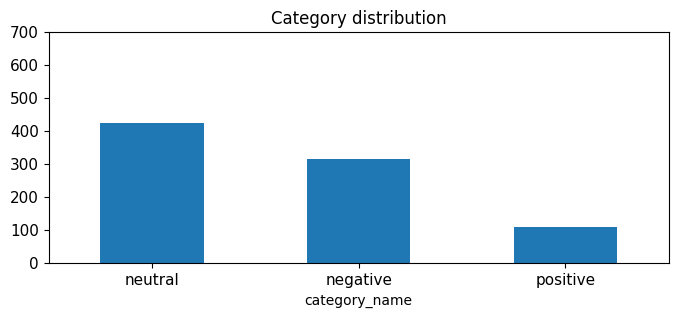

In [252]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

category_name
neutral     245
negative    193
positive     62
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

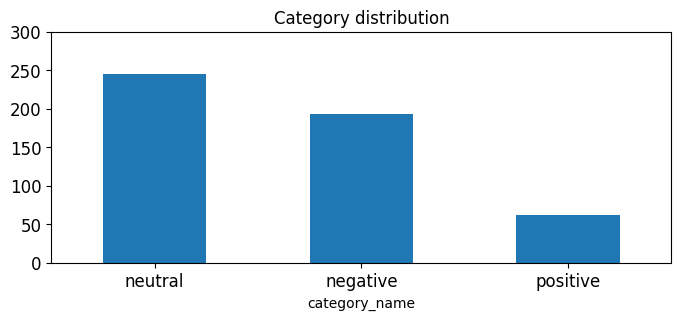

In [253]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

###  >>> ex7 ###

<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

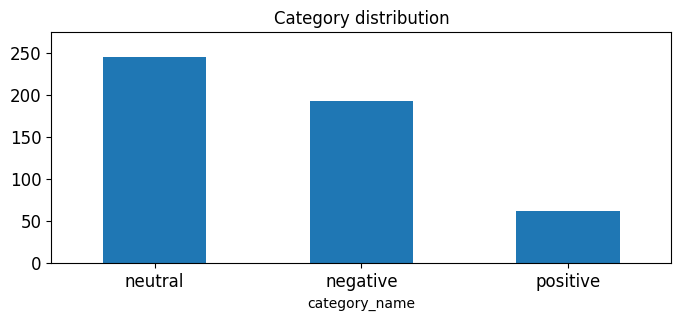

In [254]:
# Answer here
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, X_sample.category_name.value_counts().max()+30], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> ex8 ###

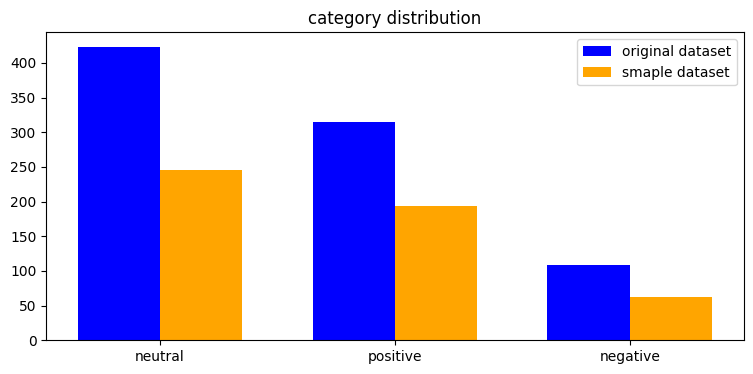

In [255]:
# Answer here
import numpy as np

plt.figure(figsize = (9,4))
x = np.arange(len(categories))
bar_width = 0.35

y_X = X.category_name.value_counts()
plt.bar(x, y_X, bar_width, label="original dataset", color="blue") 

y_sample = X_sample.category_name.value_counts()
plt.bar(x + bar_width, y_sample, bar_width, label="smaple dataset", color="orange") 

plt.xticks(x + bar_width/2, categories)
plt.title('category distribution')
plt.legend()


### 5.2 Feature Creation ###

In [256]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

[nltk_data] Downloading package punkt to /Users/huang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/huang/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [257]:
X[0:3]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
Name: unigrams, dtype: object

In [258]:
X[0:3]

,text,category,category_name,unigrams
0,Calls on retards,-1,negative,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,0,neutral,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,0,neutral,"[Seeing, lots, of, red, in, the, ticker, .]"


In [259]:
list(X[0:1]['unigrams'])

[['Calls', 'on', 'retards']]

### 5.3 Feature subset selection ###

In [260]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2706))	1
  (np.int32(0), np.int32(3248))	1


In [261]:
count_vect.get_feature_names_out()[1488]

'fake'

In [262]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

### >>> ex9 ###

In [263]:
#turn array[0] text document into a tokenized text using the build_analyzer()
analyze(X.text[0])

['calls', 'on', 'retards']

In [264]:
X_counts.shape

(847, 4346)

In [265]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [266]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [267]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

### >>> ex10 ###

In [268]:
#get the first nonzero word in the fifth record
row5 = X_counts[4]

row5_nonzero = np.nonzero(row5)[1]
row5_nonzero_sort = np.sort(row5_nonzero)
count_vect.get_feature_names_out()[row5_nonzero_sort[0]]


'didn'

In [269]:
#get the second nonzero word in the fifth record
count_vect.get_feature_names_out()[row5_nonzero_sort[1]]

'he'

In [270]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [271]:
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]


In [272]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

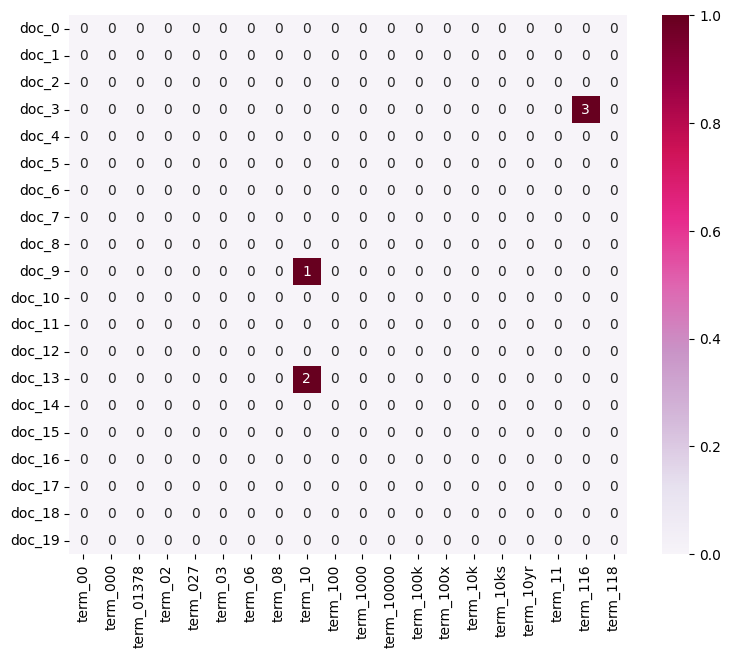

In [273]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### >>> ex11 ###

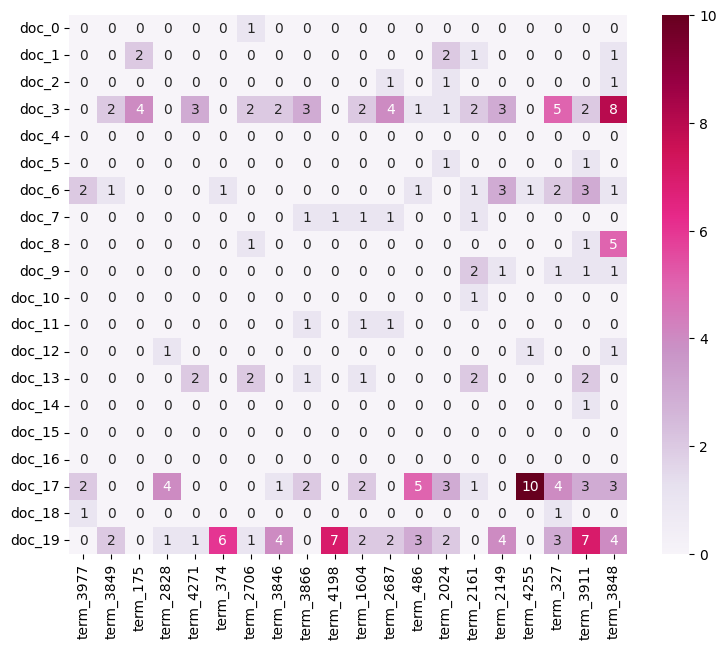

In [274]:
#for the first 20 documents, select 20 words that occur most frequency

#select first 20 documents
row = X_counts[:20]
#summing up the frequency of each word
row_sum = row.toarray().sum(axis=0)
#take the top 20 most frequency words
top_20 = np.argsort(row_sum)[-20:]

plot_x = ["term_"+str(i) for i in top_20]
plot_z = row[:, top_20].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
max = df_todraw.max().max()

plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=max, annot=True)

### 5.4 Attribute Transformation / Aggregation ###

In [275]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [276]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [277]:
term_frequencies[0] #sum of first term: 00

np.int64(4)

/var/folders/h2/zcft3ttd2kb35xtj95pk5n780000gn/T/ipykernel_5714/3140323867.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '01378'),
 Text(3, 0, '02'),
 Text(4, 0, '027'),
 Text(5, 0, '03'),
 Text(6, 0, '06'),
 Text(7, 0, '08'),
 Text(8, 0, '10'),
 Text(9, 0, '100'),
 Text(10, 0, '1000'),
 Text(11, 0, '10000'),
 Text(12, 0, '100k'),
 Text(13, 0, '100x'),
 Text(14, 0, '10k'),
 Text(15, 0, '10ks'),
 Text(16, 0, '10yr'),
 Text(17, 0, '11'),
 Text(18, 0, '116'),
 Text(19, 0, '118'),
 Text(20, 0, '12'),
 Text(21, 0, '1242'),
 Text(22, 0, '125'),
 Text(23, 0, '12855584'),
 Text(24, 0, '13'),
 Text(25, 0, '14'),
 Text(26, 0, '140'),
 Text(27, 0, '145'),
 Text(28, 0, '14th'),
 Text(29, 0, '15'),
 Text(30, 0, '150'),
 Text(31, 0, '153'),
 Text(32, 0, '15m'),
 Text(33, 0, '16'),
 Text(34, 0, '160'),
 Text(35, 0, '17'),
 Text(36, 0, '1700'),
 Text(37, 0, '1728'),
 Text(38, 0, '17th'),
 Text(39, 0, '18'),
 Text(40, 0, '186'),
 Text(41, 0, '18630'),
 Text(42, 0, '1870'),
 Text(43, 0, '1934'),
 Text(44, 0, '1945'),
 Text(45, 0, '1947'),
 Text(46, 0, '1953'),
 Text(47, 0

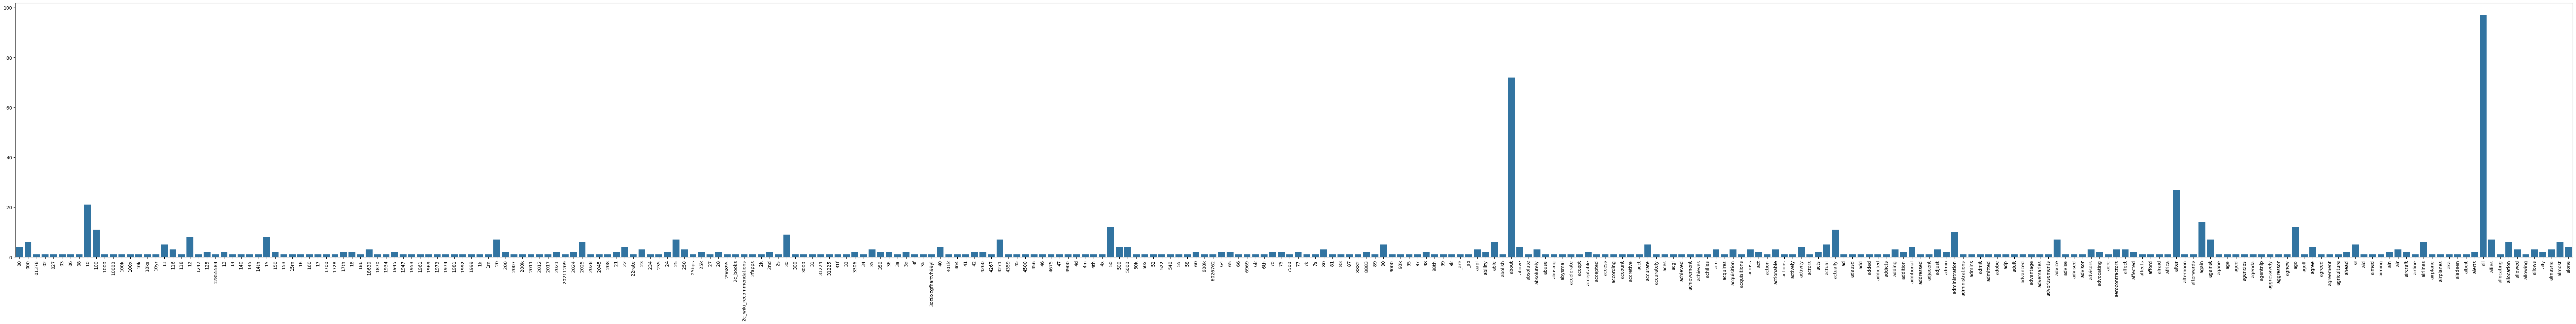

In [278]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

### >>> ex12 ###

In [279]:
# use plotly to get a nicer interactive visuliazation
import plotly.express as px

plot_x = count_vect.get_feature_names_out()[:300]
plot_y = term_frequencies[:300]

df_todraw = pd.DataFrame({"words" : plot_x, "frequency" : plot_y})

fig = px.bar(df_todraw, x = "words", y = "frequency")
fig.update_layout(width=1000, height=500)
fig.show()



### >>> ex13 ###

In [280]:
#reduce the words that frequency is smaller than 5
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies_nonzero = np.where(term_frequencies[:300] >= 5)[0]

plot_x = count_vect.get_feature_names_out()[:300][term_frequencies_nonzero]
plot_y = term_frequencies[:300][term_frequencies_nonzero]

df_todraw = pd.DataFrame({"words" : plot_x, "frequency" : plot_y})
fig = px.bar(df_todraw, x = "words", y = "frequency")
fig.update_layout(width=1000, height=500)
fig.show()

### >>> ex14 ###

In [281]:
# sort the words based on their frequencies
words = count_vect.get_feature_names_out()
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

index = np.lexsort((words, -term_frequencies))
term_frequencies_sort = term_frequencies[index]
words_sort = words[index]

df_todraw = pd.DataFrame({"words" : words_sort, "frequency" : term_frequencies_sort})
fig = px.bar(df_todraw[:500], x = "words", y = "frequency")
fig.update_layout(width=1300, height=800)
fig.show()

In [282]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/var/folders/h2/zcft3ttd2kb35xtj95pk5n780000gn/T/ipykernel_5714/2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



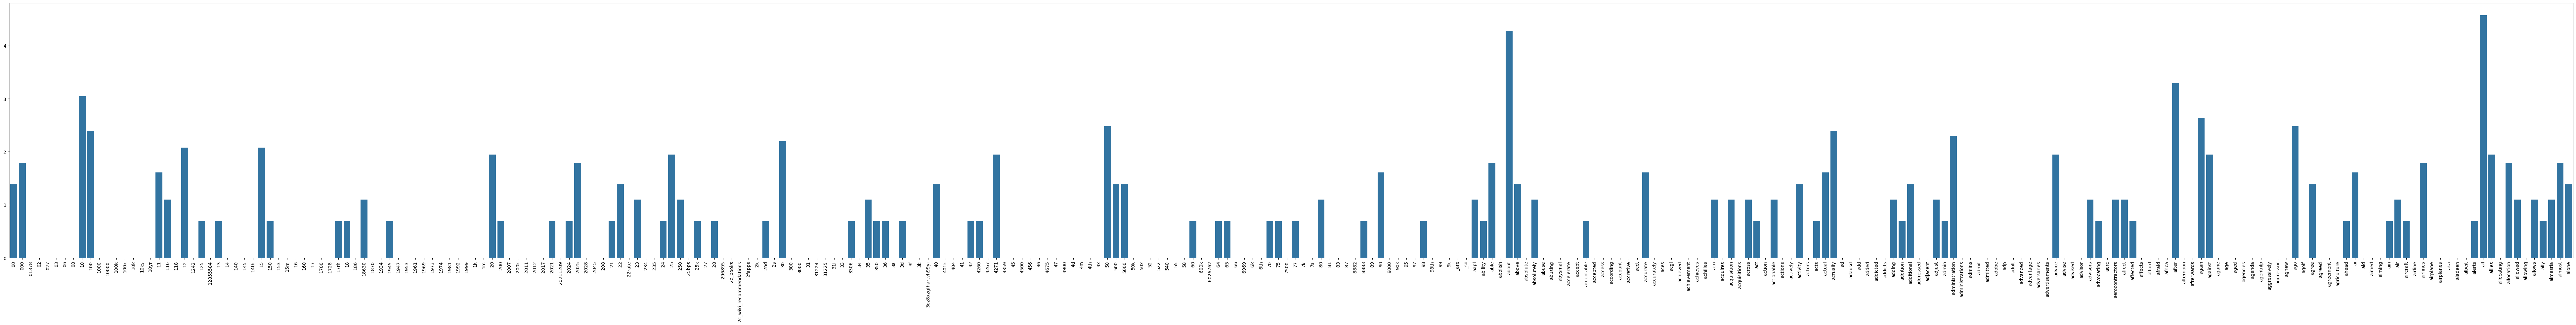

In [283]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> ex15 ###

In [284]:

words = count_vect.get_feature_names_out()
term_frequencies_log = np.asarray(term_frequencies_log)

index = np.lexsort((words, -term_frequencies_log))
term_frequencies_sort_log = term_frequencies_log[index]
words_sort = words[index]

df_todraw = pd.DataFrame({"words" : words_sort, "frequency" : term_frequencies_sort_log})
fig = px.bar(df_todraw[:500], x = "words", y = "frequency")
fig.update_layout(width=1300, height=800)
fig.show()

'''same as the master's data, after using log function, 
the frequency difference of high and low frequency words 
is reduced, also the up line of the bars is more flat'''

"same as the master's data, after using log function, \nthe frequency difference of high and low frequency words \nis reduced, also the up line of the bars is more flat"

## new data visualization ##

take the most frequent 30 words to visualize as circular barplot



In [285]:
df_todraw = pd.DataFrame({"words" : words_sort, "frequency" : term_frequencies_sort})
df_todraw = df_todraw[:30]

In [286]:
print(df_todraw)

     words  frequency
0      the        920
1       to        566
2      and        488
3       is        402
4       it        350
5       of        311
6       in        286
7     that        238
8      for        214
9     this        213
10     you        195
11      on        171
12     are        155
13    they        150
14      be        134
15      he        132
16    will        127
17    with        126
18      if        119
19      as        115
20  market        111
21     but        108
22     not        107
23      so        103
24     all         97
25    have         97
26      us         96
27    just         95
28     was         94
29      at         92


In [293]:
upperLimit = 150
lowerLimit = 30

max = df_todraw['frequency'].max()

#convert height
#convert the most frequency data to upperlimit(150)
slope = (upperLimit - lowerLimit) / max
heights = slope * df_todraw['frequency'] + lowerLimit
#print(heights[:30])

#compurt width
width = 2*np.pi / len(df_todraw.index)
#print(width*180/np.pi)

#compute the angle of each bar
indexes = list(range(1, len(df_todraw.index)+1))
angles = [element * width for element in indexes]

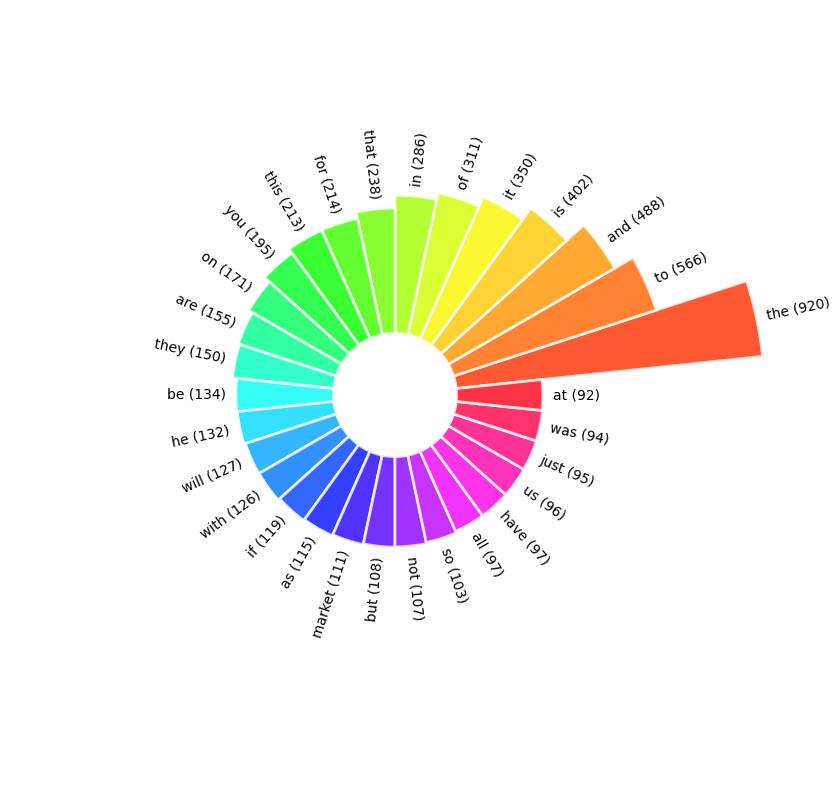

In [295]:
plt.figure(figsize=(20,10))

ax = plt.subplot(111, polar=True)

plt.axis('off')

# Draw bar
bars = ax.bar(
    x = angles, 
    height = heights, 
    width = width, 
    bottom = lowerLimit,
    linewidth = 2, 
    edgecolor = "white")

# Add label
for bar, angle, height, label, freq in zip(bars, angles, heights, df_todraw["words"], df_todraw['frequency']):

    #rotate label
    rotation = np.rad2deg(angle)

    # Flip some labels
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    ax.text(
        x = angle, 
        y = lowerLimit + bar.get_height() + 5, 
        s = label + " (" + str(freq) + ")", 
        ha = alignment, 
        va = 'center', 
        rotation = rotation, 
        rotation_mode = "anchor") 

#color
for angle, bar in zip(angles, bars):
    bar.set_facecolor(plt.cm.hsv(math.degrees(angle)/360))
    bar.set_alpha(0.8)

plt.show()


# Phase 2

In [289]:
### Begin Assignment Here